In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
dataset = fetch_california_housing()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
df = pd.DataFrame(X, columns=dataset.feature_names)
correlation_matrix = df.corr()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = dataset.feature_names
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(dataset.feature_names))]
vif_data


,Feature,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


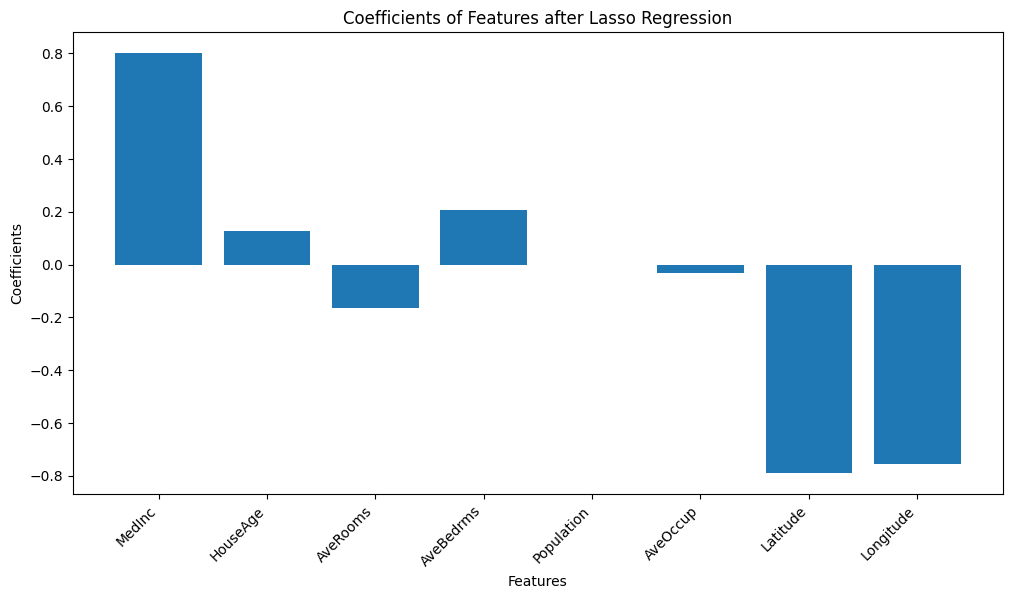

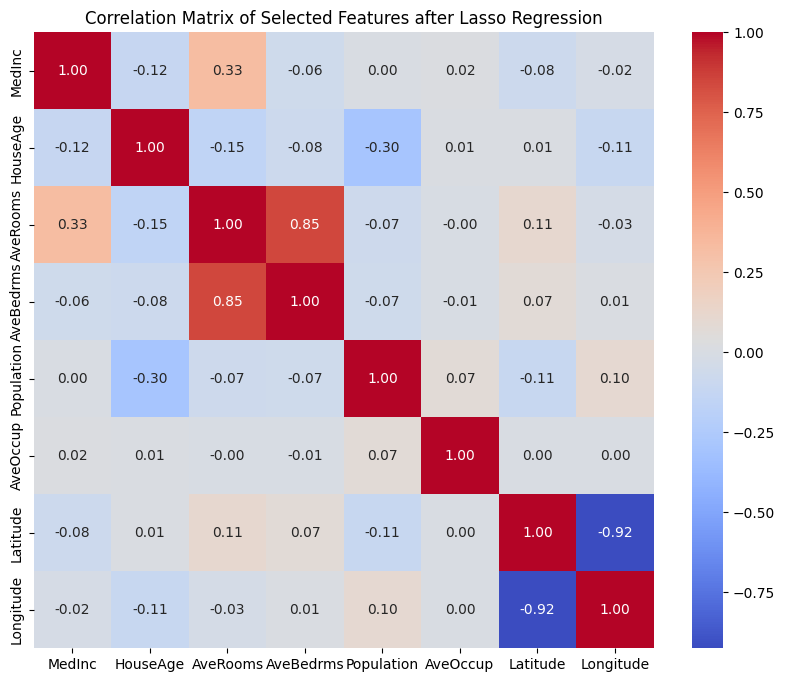

In [6]:
lasso = Lasso(alpha=0.01)  # Adjust alpha parameter as needed
lasso.fit(X_train_scaled, y_train)

# Plot coefficients
plt.figure(figsize=(12, 6))
plt.bar(range(len(lasso.coef_)), lasso.coef_, tick_label=X.columns)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Features after Lasso Regression')
plt.show()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features after Lasso Regression')
plt.show()


In [5]:
predict = lasso.predict(X_test_scaled)
mse = np.mean((predict - y_test) ** 2)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.5482548967938962
